In [87]:
import pandas as pd
import geopandas as gpd
import os
import pylab as plt
from importlib import reload
import emdat_df
reload(emdat_df)
from emdat_df import emdat
import utils
reload(utils)
from utils import get_GNI, get_pop

import datetime
import wbdata
%pylab inline

data = os.getenv('data')

Populating the interactive namespace from numpy and matplotlib


/home/nicholasjones/miniconda3/envs/GPD3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## 1. Load downloaded Excel file as a PyEmdat object

In [88]:
ED = emdat((data + '/emdat_1960.xlsx'))

## 2. Number of events for selected countries, dates and hazards

In [42]:
df = ED.disaster_count_timeseries(1960, 2000, countries = [], disastertype = ['Storm','Flood', 'Earthquake','Volcanic activity','Landslide'])
df.head(2)

disaster_type,Earthquake,Flood,Landslide,Storm,Volcanic activity
year,,,,,
1961-01-01,3.0,8.0,2.0,14.0,0.0
1962-01-01,4.0,8.0,2.0,13.0,0.0


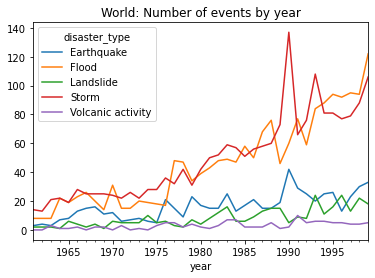

In [27]:
df.plot(title = 'World: Number of events by year');

## 2. Disaster statistics for a single period (eg. sum of damages from year x to y)

In [28]:
result = ED.disaster_stats_total_for_period(1990, 2000, countries = ['Bangladesh'], disastertype = ['Storm'], stats = ['total_affected'])
print("Total people affected by storm in Bangladesh 1990-2000: {:,.0f}".format(result))

Total people affected by storm in Bangladesh 1990-2000: 23,603,895


## 3. Single period grouped by disaster types

In [89]:
result = ED.disaster_stats_entire_period(1980, 2020, countries = ['Pakistan'], disastertype = [], stats = ['total_damages'])
result

,total_damages
disaster_type,
Flood,19911378.0
Earthquake,5348500.0
Storm,1710936.0
Drought,247000.0
Industrial accident,179080.0
Miscellaneous accident,22000.0
Extreme temperature,18000.0
Landslide,18000.0
Epidemic,0.0


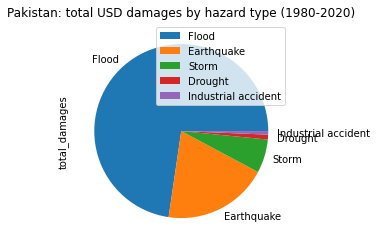

In [91]:
result = ED.disaster_stats_entire_period(1980, 2020, countries = 'Pakistan', disastertype = 'all', stats = ['total_damages'])
result.head().plot(kind = 'pie', y='total_damages', figsize =[4,4])
plt.title('Pakistan: total USD damages by hazard type (1980-2020)');

## 4. Time series grouped by hazard (for selected countries & dates)

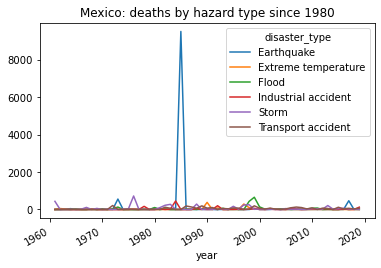

In [47]:
df = ED.disaster_stats_timeseries(1960, 2020, 'Mexico','all','deaths')
cols_over_1000 = [column for column in df.columns if df[column].sum() > 1000]
df[cols_over_1000].plot(title = 'Mexico: deaths by hazard type since 1980');

## 5. Time series grouped by country (for selected dates & hazard)

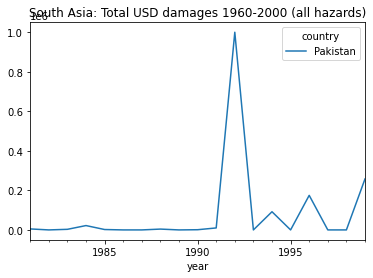

In [48]:
df = ED.country_stats_timeseries(1980, 2000, ['Pakistan'],'all','total_damages')
df.plot(title = 'South Asia: Total USD damages 1960-2000 (all hazards)');

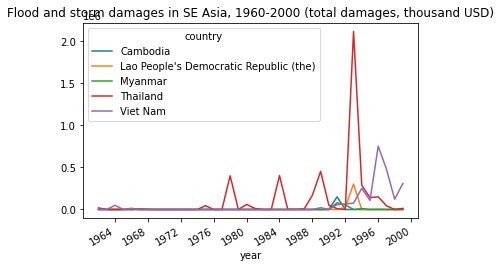

In [49]:
df = ED.country_stats_timeseries(1960, 2000, ["Lao People's Democratic Republic (the)",'Cambodia','Thailand','Viet Nam','Myanmar'],['Flood','Storm'],'total_damages')
df.plot(title = 'Flood and storm damages in SE Asia, 1960-2000 (total damages, thousand USD)');

## 6. Get income and GNI for selected years & countries

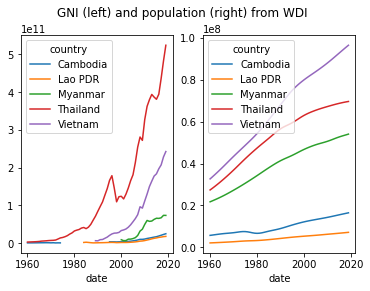

In [50]:
df_gni = get_GNI(df)
df_pop = get_pop(df)

f, (axes) = plt.subplots(nrows=1,ncols=2)
df_gni.plot(ax = axes[0])
df_pop.plot(ax = axes[1])
plt.suptitle('GNI (left) and population (right) from WDI');

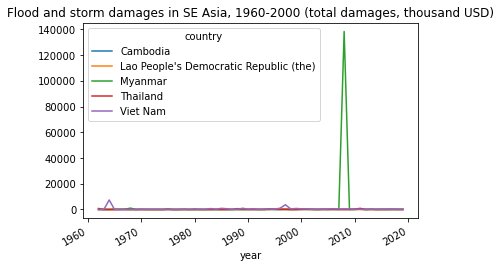

In [51]:
SE_Asia_flood_storm_deaths_since_1960 = ED.country_stats_timeseries(1960, 2020, ["Lao People's Democratic Republic (the)",'Cambodia','Thailand','Viet Nam','Myanmar'],['Flood','Storm'],'deaths')
SE_Asia_flood_storm_deaths_since_1960.plot(title = 'Flood and storm damages in SE Asia, 1960-2000 (total damages, thousand USD)');

Text(0.5, 1.0, 'Flood and storm deaths per capita in Southeast Asia since 1960')

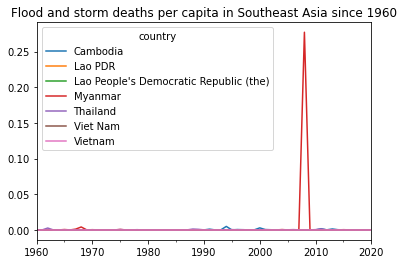

In [53]:
SE_Asia_pop = get_pop(SE_Asia_flood_storm_deaths_since_1960)
SE_Asia_flood_storm_deaths_since_1960_percent_pop = SE_Asia_flood_storm_deaths_since_1960 / SE_Asia_pop * 100
SE_Asia_flood_storm_deaths_since_1960_percent_pop.fillna(0, inplace=True)
SE_Asia_flood_storm_deaths_since_1960_percent_pop.plot()
plt.title('Flood and storm deaths per capita in Southeast Asia since 1960')

In [274]:
# SCRAP

mydict = {}
for item in ED.df.country.unique():
    try:
        mydict[item] = ED.df.ISO[ED.df.country == item].reset_index(drop=True)[0]
    except:
        pass
pd.Series(mydict).rename('ISO').to_csv(data+'/ISO_codes.csv')

ISO_dict = pd.read_csv(data+'/ISO_codes.csv',index_col=[0]).ISO.to_dict()